# `scipy.spatial` 

scipy.spatial can compute triangulations, Voronoi diagrams, and convex hulls of a set of points, by leveraging the `Qhull` library.

Moreover, it contains `KDTree` implementations for nearest-neighbor point queries, and utilities for distance computations in various metrics.

## Triangulations (qhull)

In [1]:
%matplotlib inline

import numpy as np
from scipy.spatial import Delaunay, ConvexHull, Voronoi
import matplotlib.pyplot as plt


points = np.random.rand(30, 2)   # 30 random points in 2-D

tri = Delaunay(points)
hull = ConvexHull(points)
voronoi = Voronoi(points)

In [2]:
print ("Neighbour triangles\n",tri.neighbors[0:5])
print ("Simplices\n", tri.simplices[0:5])
print ("Points\n", points[tri.simplices[0:5]])

Neighbour triangles
 [[-1 40 23]
 [ 5 -1  2]
 [ 1 25  6]
 [-1  5  4]
 [31 -1  3]]
Simplices
 [[18  6 10]
 [11  7 15]
 [ 5  7 11]
 [ 3 27 15]
 [27  3 13]]
Points
 [[[0.69691344 0.32011541]
  [0.61192086 0.12962791]
  [0.99481548 0.31056002]]

 [[0.15283993 0.33363379]
  [0.13765188 0.60927971]
  [0.07522543 0.76356215]]

 [[0.17478781 0.58335976]
  [0.13765188 0.60927971]
  [0.15283993 0.33363379]]

 [[0.17693506 0.64430141]
  [0.08831636 0.84115115]
  [0.07522543 0.76356215]]

 [[0.08831636 0.84115115]
  [0.17693506 0.64430141]
  [0.15352518 0.92997456]]]


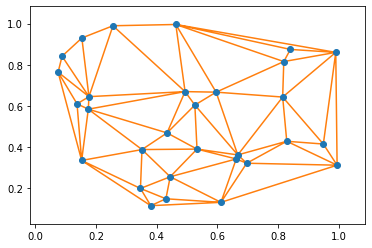

In [3]:
from scipy.spatial import delaunay_plot_2d
delaunay_plot_2d(tri)
pass

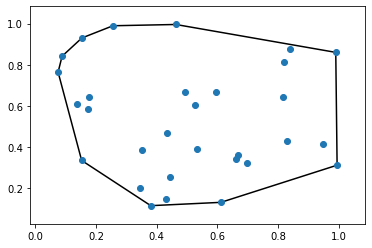

In [4]:
from scipy.spatial import convex_hull_plot_2d

convex_hull_plot_2d(hull)
pass

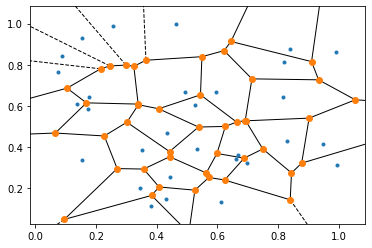

In [5]:
from scipy.spatial import voronoi_plot_2d

voronoi_plot_2d(voronoi)
pass

## KDtree

Allows very fast point to point searches.

In [6]:
from scipy.spatial import KDTree, cKDTree

In [7]:
tree = cKDTree(points)

print (tree.data)

[[0.81910339 0.81518026]
 [0.66244382 0.34090528]
 [0.4937389  0.66882636]
 [0.17693506 0.64430141]
 [0.5960561  0.66623942]
 [0.17478781 0.58335976]
 [0.61192086 0.12962791]
 [0.13765188 0.60927971]
 [0.66746467 0.36057506]
 [0.35172303 0.38664652]
 [0.99481548 0.31056002]
 [0.15283993 0.33363379]
 [0.43425695 0.46781205]
 [0.15352518 0.92997456]
 [0.94945147 0.41358134]
 [0.07522543 0.76356215]
 [0.52601528 0.60334304]
 [0.34666221 0.1972122 ]
 [0.69691344 0.32011541]
 [0.81540219 0.64238227]
 [0.25608302 0.98957348]
 [0.38070927 0.11337612]
 [0.53304453 0.38891116]
 [0.9904052  0.85991954]
 [0.84089722 0.87430788]
 [0.44470288 0.25423641]
 [0.46321062 0.99578119]
 [0.08831636 0.84115115]
 [0.43059428 0.14698036]
 [0.82890029 0.42705414]]


In [8]:
%%timeit

tree.query((0.5,0.5))

38.5 µs ± 796 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
test_points = np.random.rand(1000, 2)   # 1000 random points in 2-D

In [10]:
%%timeit

tree.query(test_points) 

509 µs ± 7.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
more_points = np.random.rand(10000, 2)   # 1000 random points in 2-D

big_tree = KDTree(more_points)

In [12]:
%%timeit

KDTree(more_points)

3.51 ms ± 80 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

big_tree.query(test_points) 

892 µs ± 14.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Compare this to the brute-force version


At what point does it make sense to use kdTree and not brute-force distance tests ?

The brute force method takes a fixed time per sample point and a fixed cost associated with the N-neighbour distance computation (but this can be vectorised efficiently).

In [14]:
# Brute force version

def brute_force_distance(pts, spt):

    d = pts - spt
    d2 = d**2
    distances2 = np.einsum('ij->i',d2)
    
    nearest = np.argsort(distances2)[0]
    
    return np.sqrt(distances2[nearest]), nearest

# print np.einsum('ij->i',distances2)

In [15]:
print (brute_force_distance(more_points, (0.0,0.0)))
print (big_tree.query((0.0,0.0)))

(0.009504639538830344, 5923)
(0.009504639538830344, 5923)


In [16]:
%%timeit

brute_force_distance(points, (0.5,0.5))
brute_force_distance(points, (0.0,0.0))
brute_force_distance(points, (0.25,0.25))

46 µs ± 607 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit

tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

41.9 µs ± 437 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%%timeit

brute_force_distance(more_points, (0.5,0.5))
# brute_force_distance(more_points, (0.0,0.0))
# brute_force_distance(more_points, (0.25,0.25))

927 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
%%timeit

big_tree.query(np.array([(0.5,0.5), (0.0,0.0), (0.25,0.25)]))

49.9 µs ± 1.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
